In [7]:
# CNN için veri hazırlığı
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

PROJECT_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_DIR / "data"
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

IMG_SIZE = (128, 128)   # CNN'e girecek görsel boyutu
BATCH_SIZE = 32

# Görselleri otomatik etiketleyen ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,        # pikselleri normalize ettim
    rotation_range=10,     # küçük dönüşler
    zoom_range=0.1,        # yakınlaştırma
    horizontal_flip=True,  # yatay çevirme
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

print("\n Veri jeneratörleri hazır!")
print("Sınıflar:", train_generator.class_indices)


Found 4096 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.

 Veri jeneratörleri hazır!
Sınıflar: {'Alzheimer': 0, 'Not_Alzheimer': 1}


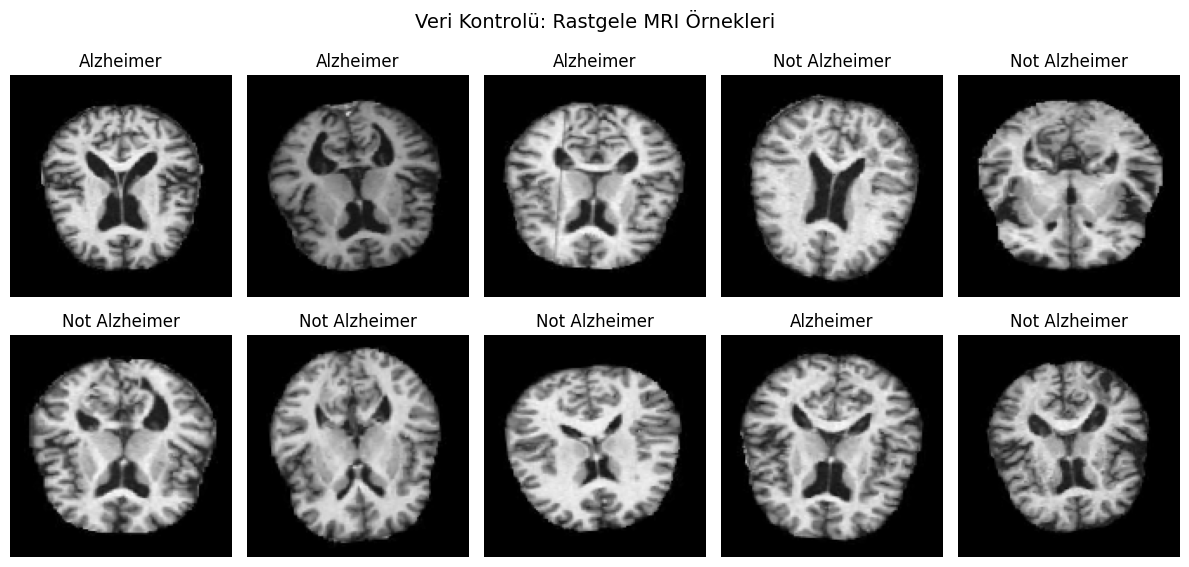

In [9]:
# Örnek MRI görsellerini görselleştirme (batch üzerinden)
import matplotlib.pyplot as plt
import numpy as np

# Bir batch al (örneğin 32 görsel)
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    label_text = "Alzheimer" if labels[i] == 0 else "Not Alzheimer"
    plt.title(label_text)
    plt.axis("off")

plt.suptitle("Veri Kontrolü: Rastgele MRI Örnekleri", fontsize=14)
plt.tight_layout()
plt.show()


Found 4096 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.

 Veri jeneratörleri başarıyla hazırlandı!
Sınıflar: {'Alzheimer': 0, 'Not_Alzheimer': 1}


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


/opt/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.5474 - loss: 2.0125 - val_accuracy: 0.6732 - val_loss: 0.6781
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5862 - loss: 1.6678 - val_accuracy: 0.6907 - val_loss: 0.6561
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5952 - loss: 1.2803 - val_accuracy: 0.6849 - val_loss: 0.6222
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.6094 - loss: 0.9634 - val_accuracy: 0.6917 - val_loss: 0.6022
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.6191 - loss: 0.8345 - val_accuracy: 0.6985 - val_loss: 0.6034
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.6204 - loss: 0.7128 - val_accuracy: 0.7005 - val_loss: 0.5736
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.6331 - loss: 0.6624 - val_accuracy: 0.7102 - val_loss: 0.5681
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.6572 - loss: 0.6334 - val

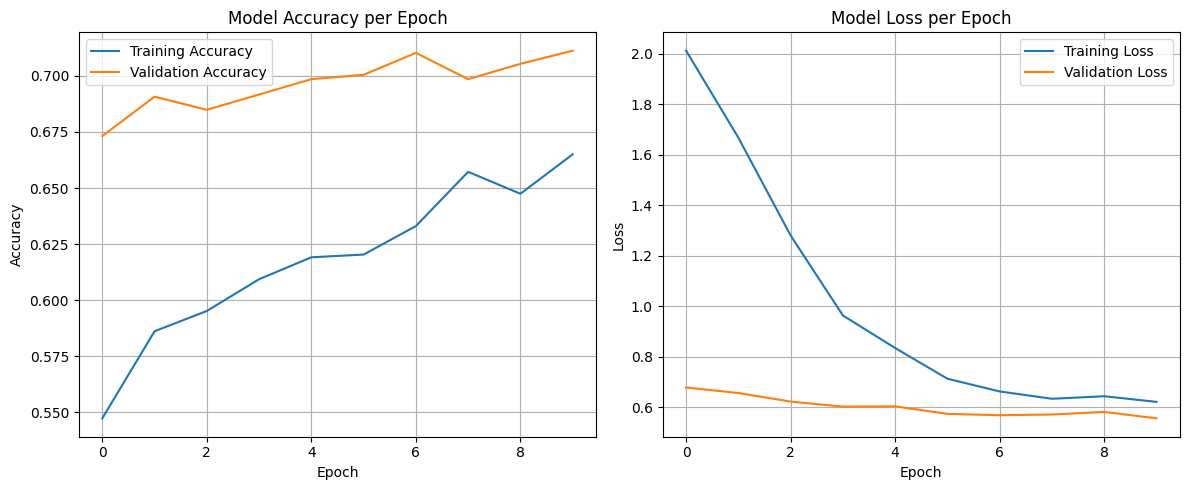

 Model kaydedildi: /Users/iremcelik/Desktop/alzheimer_prediction/models/alzheimer_vgg16_finetuned.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


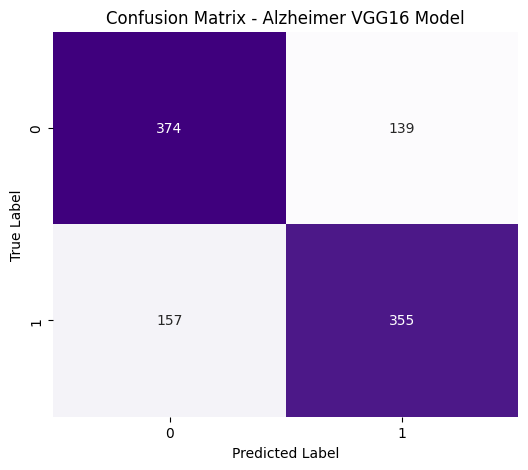


📄 Classification Report:

               precision    recall  f1-score   support

Not Alzheimer       0.70      0.73      0.72       513
    Alzheimer       0.72      0.69      0.71       512

     accuracy                           0.71      1025
    macro avg       0.71      0.71      0.71      1025
 weighted avg       0.71      0.71      0.71      1025


ROC-AUC Score: 0.790


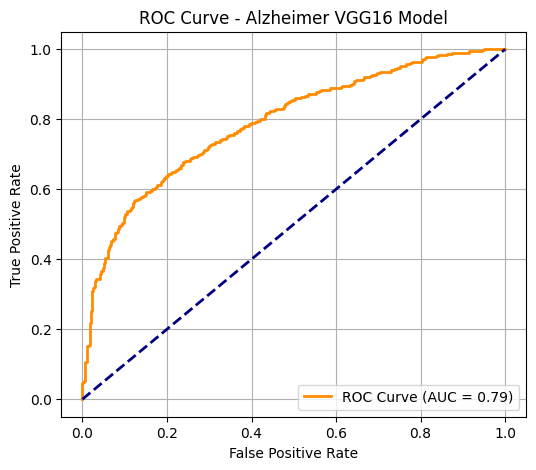

In [13]:
# Alzheimer Detection with VGG16 (Fine-tuned)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
import os


#  Veri yolları


PROJECT_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_DIR / "data"
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32


# Veri çoğaltma (augmentation)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',       # VGG16 3 kanal bekliyor
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("\n Veri jeneratörleri başarıyla hazırlandı!")
print("Sınıflar:", train_generator.class_indices)


#  VGG16 Modeli (önceden eğitilmiş)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Tüm katmanları dondur (ön öğrenilmiş özellikleri korur)
for layer in base_model.layers:
    layer.trainable = False

# Üst katmanları ekle (senin veri setine özel)
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


# Early Stopping


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Model eğitimi


EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop],
    verbose=1
)


#  Accuracy ve Loss Grafikleri


plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Modeli Kaydet


MODEL_DIR = PROJECT_DIR / "models"
os.makedirs(MODEL_DIR, exist_ok=True)
model_path = MODEL_DIR / "alzheimer_vgg16_finetuned.keras"
model.save(model_path)
print(f" Model kaydedildi: {model_path}")


#  Model Performansı


y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Alzheimer VGG16 Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\n📄 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Alzheimer", "Alzheimer"]))

roc_auc = roc_auc_score(y_true, y_pred_probs)
print(f"\nROC-AUC Score: {roc_auc:.3f}")


#  ROC Curve

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc_val:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Alzheimer VGG16 Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


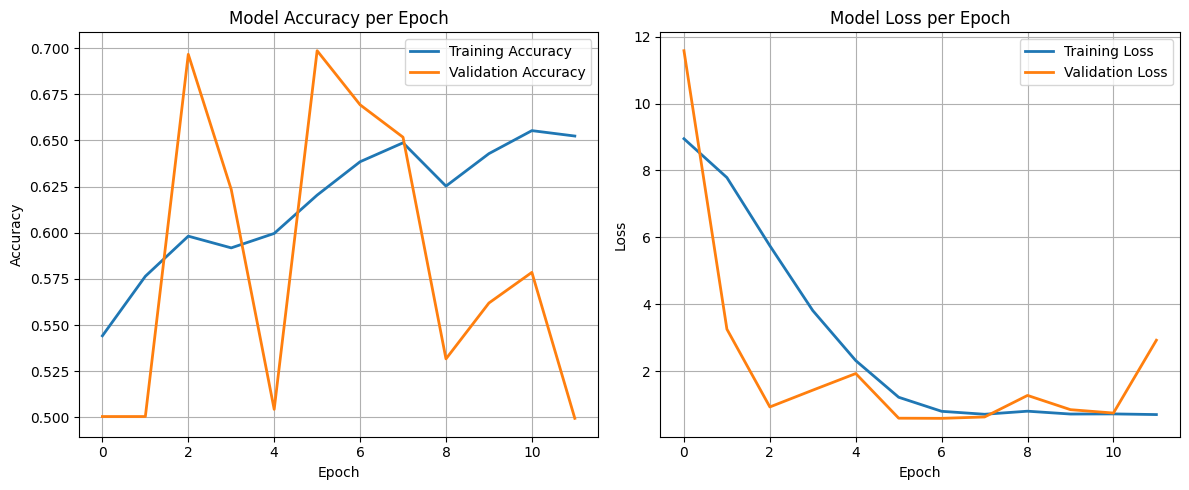

Training completed and curves plotted successfully.


In [11]:
# Eğitim Sonrası Görselleştirmeler


import matplotlib.pyplot as plt

# Accuracy ve Loss Eğrileri
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Model Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training completed and curves plotted successfully.")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


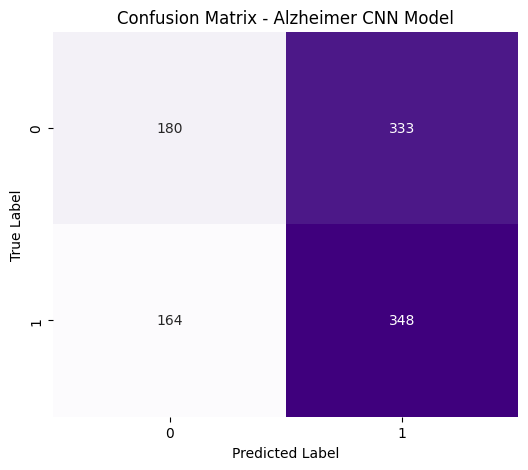

Classification Report:

               precision    recall  f1-score   support

Not Alzheimer       0.52      0.35      0.42       513
    Alzheimer       0.51      0.68      0.58       512

     accuracy                           0.52      1025
    macro avg       0.52      0.52      0.50      1025
 weighted avg       0.52      0.52      0.50      1025

ROC-AUC Score: 0.517


In [12]:
# Model Performansını Test Etme

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np
import seaborn as sns

# Tahminleri al
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

# Karışıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Alzheimer CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Sınıflandırma Raporu
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Alzheimer", "Alzheimer"]))

# ROC-AUC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"ROC-AUC Score: {auc:.3f}")
